In [87]:
import pandas as pd                                              ###### Dataframes
import numpy as np                                               ###### Arrays
import matplotlib.pyplot as plt                                  ###### Graphs
import seaborn as sns                                            ###### More Graphs
from scipy import stats                                          ###### Some Statiscical Functions
from IPython.display import display
import math
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [88]:
# Load the data
df = pd.read_csv('diabetes2.csv')

In [89]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Problem Statement 
## The objective is to predict based on diagnostic measurements whether a patient has diabetes.

In [90]:
display('The first few rows : ', df.head())

'The first few rows : '

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
display(' The Last Few Rows of our Data : ', df.tail())

' The Last Few Rows of our Data : '

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [92]:
display(' The Random Few Rows of our Data :' , df.sample(5))

' The Random Few Rows of our Data :'

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
737,8,65,72,23,0,32.0,0.600,42,0
0,6,148,72,35,0,33.6,0.627,50,1
430,2,99,0,0,0,22.2,0.108,23,0
225,1,87,78,27,32,34.6,0.101,22,0
202,0,108,68,20,0,27.3,0.787,32,0


In [93]:
display(' The Shape of the Data : ', df.shape)

' The Shape of the Data : '

(768, 9)

In [94]:
display('The Columns of the Dataset :', df.columns)

'The Columns of the Dataset :'

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [95]:
display('The types of data in these columns :', df.dtypes)

'The types of data in these columns :'

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [96]:
display('Unique Values in the each column :', df.nunique())

'Unique Values in the each column :'

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [97]:
display('Null Values in the Data : ', df.isnull().sum() )

'Null Values in the Data : '

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [98]:
display('Columnwise list of non null values : ', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


'Columnwise list of non null values : '

None

In [99]:
display(' Univariate Analysis: Descriptive Statistics')

' Univariate Analysis: Descriptive Statistics'

# Descriptive Statistics

In [100]:
display('1. All descriptive statistics : ', df.describe().T )

'1. All descriptive statistics : '

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Descriptive statistics is like the five point summary of the feature , its equivalent is box plot

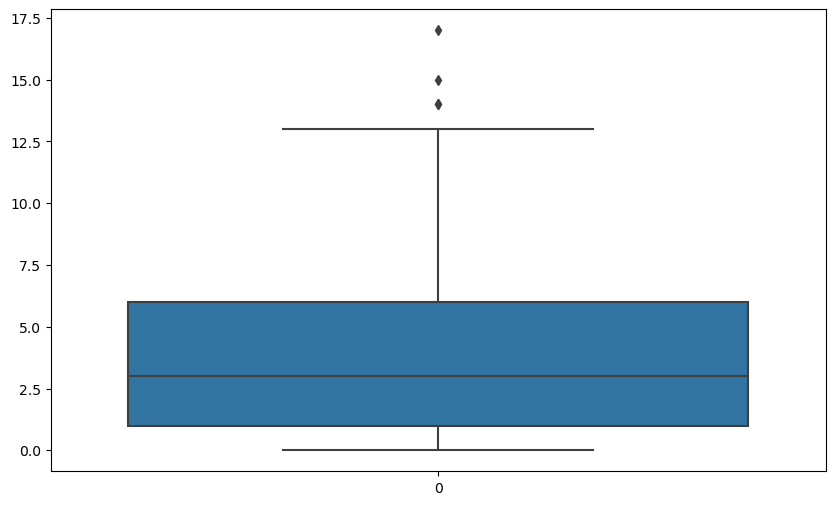

In [101]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 6))
# display boxplot to see outliers
sns.boxplot(data = df.Pregnancies,ax=ax, linewidth = 1.5 )
plt.show()

If the length of the upper whisker in a box plot is more than the length of the lower whisker by a factor of at least 2 (i.e., the length of the upper whisker is more than 1.5 times the length of the lower whisker), then it indicates that the data may have outliers on the upper end. This is because the upper whisker extends to the maximum value in the dataset that is not an outlier, which could be far from the third quartile (Q3).

On the other hand, if the length of the lower whisker is more than the length of the upper whisker by a factor of at least 2 (i.e., the length of the lower whisker is more than 1.5 times the length of the upper whisker), then it indicates that the data may have outliers on the lower end. This is because the lower whisker extends to the minimum value in the dataset that is not an outlier, which could be far from the first quartile (Q1).

In summary, a longer upper whisker compared to the lower whisker indicates potential outliers on the upper end, while a longer lower whisker compared to the upper whisker indicates potential outliers on the lower end. This information can be used to identify and investigate potential outliers in the data.

<AxesSubplot:>

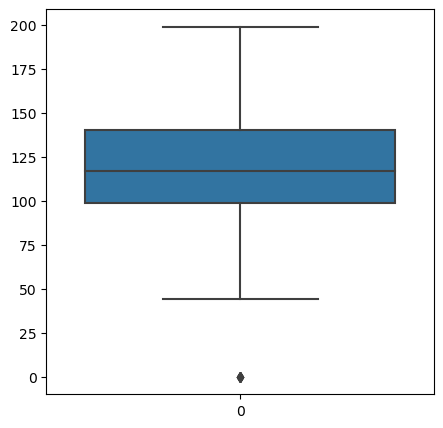

In [102]:
# GLucose
sns.boxplot(data = df.Glucose)

Upper whsiker and lower whisker are of same length, one outlier can be seen in the plot

<AxesSubplot:>

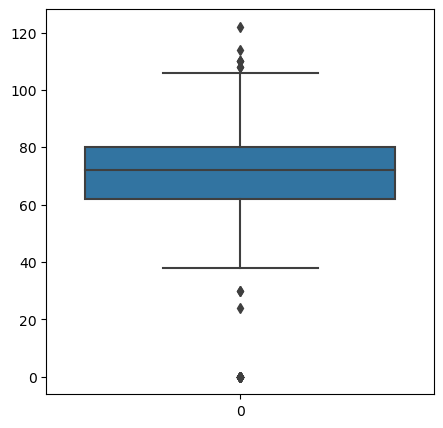

In [103]:
# Blood Pressure
sns.boxplot(data = df.BloodPressure)

Outlier on both lower and upper side , median is not shifted , whiskers are of same length , look normally distributed from this 

<AxesSubplot:>

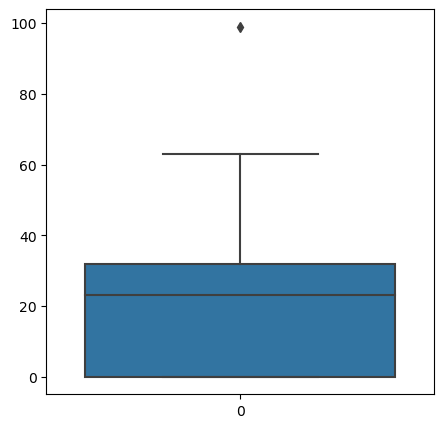

In [104]:
#SkinThickness
sns.boxplot(data = df['SkinThickness'])

No lower whisker , q1 and minimum is same value. It means that all of the datapoints in the dataset are greater than lower end of the box. In other words there are no datapoints that fall below the lower quartile of the dataset.

This can happen when the dataset is heavily skewed to the right, with most of the values concentrated towards the upper end of the range. In such cases, the lower whisker may be too short to be plotted on the box plot, as all the values are concentrated in the upper range of the dataset.

<AxesSubplot:>

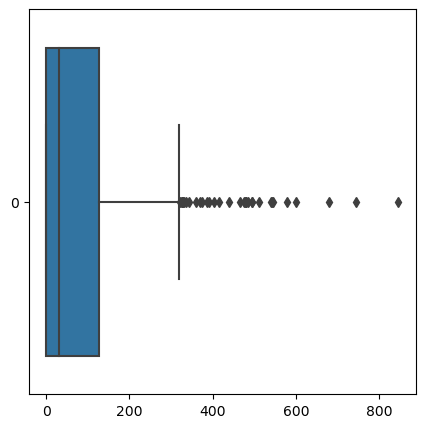

In [105]:
# INsulin
sns.boxplot(data = df.Insulin, orient = 'h')

### There are outliers in the Insulin but the data is Right skewed , this can be seen from the violin plot

<AxesSubplot:>

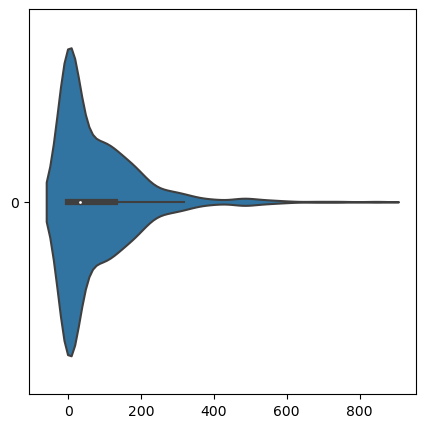

In [106]:
sns.violinplot(data = df.Insulin, orient = 'h')

### The distribution shows it is right skewed the tail is longer towards right , the data points are more towards left so median is shifted more towards Q1

<AxesSubplot:>

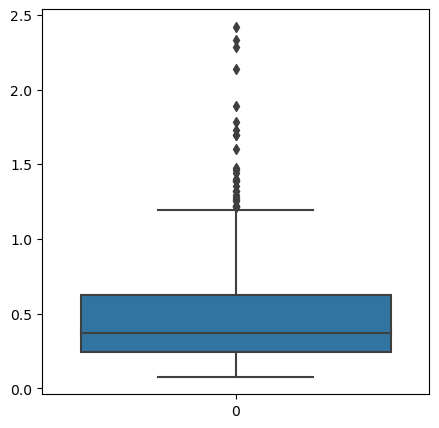

In [107]:
#Diabetes Pedigree Function
sns.boxplot(data = df.DiabetesPedigreeFunction)

### Right skewed data
### Outliers above Q3
### Median shifted more towards q1, more data point closer to q1
### lower whsiker is smaller than upper whisker 


<AxesSubplot:>

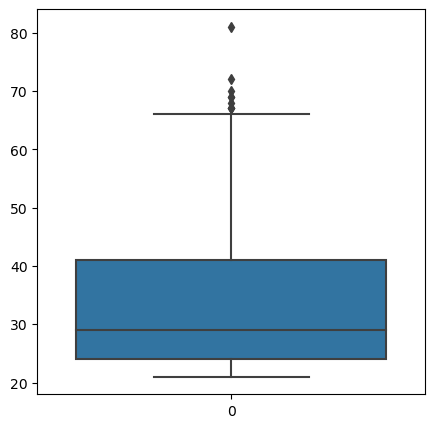

In [108]:
## AGe 
sns.boxplot(data = df.Age)

### Right skewed data 
### Median is more towards Q1 
### lower whisker smaller than upper whisker 
### Data points more towards Q1 

In [109]:
display('2. Columnwise Median :' , df.median())

'2. Columnwise Median :'

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [110]:
df.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


In [111]:
display('3.a 1st Quartile : ',df.quantile(q = 0.25) )

'3.a 1st Quartile : '

Pregnancies                  1.00000
Glucose                     99.00000
BloodPressure               62.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.30000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64

In [112]:
display('3.b 3rd Quartile : ', df.quantile(q = 0.75))

'3.b 3rd Quartile : '

Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

In [113]:
display('3.c Inter-Quartile Range (IQR) :', df.quantile(q = 0.75) - df.quantile(q = 0.25))

'3.c Inter-Quartile Range (IQR) :'

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64

## Skewness

In [114]:
display('4. 5. Skewness : ', df.skew())

'4. 5. Skewness : '

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [115]:
##  SkinThickness, Glucose is symmetrical
## pregnancies, outcome, 

# STUDYING FEATURE BY FEATURE AND REMOVING OUTLIERS OR APPLYING NORMALIZATION 

## 1. Pregnancies

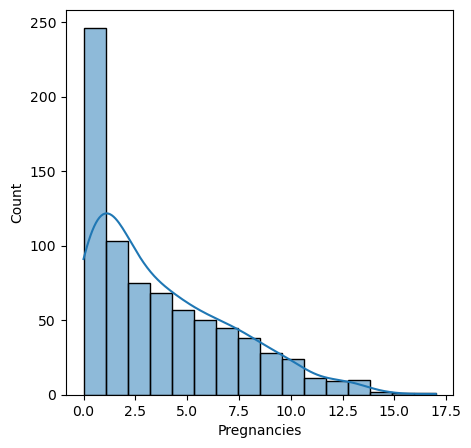

In [116]:
sns.histplot(data = df.Pregnancies, kde = True );

In [117]:
df['Pregnancies'].kurt()

0.15921977754746486

## Inference for pregnancies
#### Pregnancies has outliers can be seen from boxplot.
#### Pregnancies are right skewed.
#### Kurtosis is less than 3 closer to zero, platykurtic, outliers frequency is low , but there are outliers

## 2.Glucose 

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

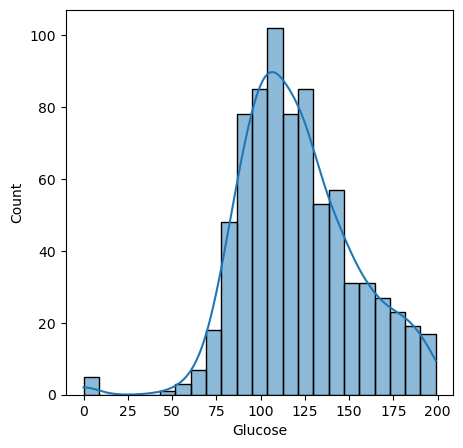

In [118]:
sns.histplot(data = df.Glucose, kde = True )

In [119]:
df.Glucose.mean(),df.Glucose.median(),df.Glucose.mode()

(120.89453125,
 117.0,
 0     99
 1    100
 Name: Glucose, dtype: int64)

In [120]:
df['Glucose'].kurt()

0.6407798203735053

### Inference 
Glucose is normally distributed,

kurtosis less than 3 platykurtic (light tailed)
 
boxplot says glucose has  outlier 



## 3. Blood Pressure 

#### Blood Pressure has value less than -1 it is highly skewd since negative left skewd 

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

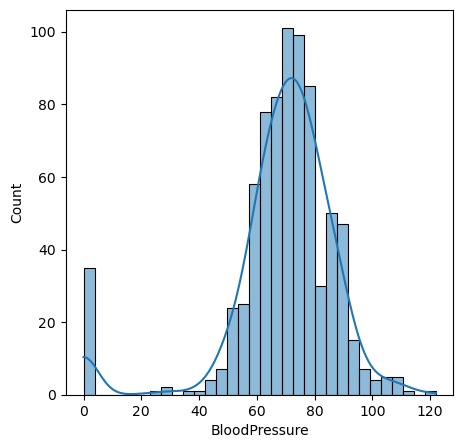

In [121]:
sns.histplot(data = df.BloodPressure, kde = True )

In [122]:
df.BloodPressure.kurt()

5.180156560082496

<AxesSubplot:>

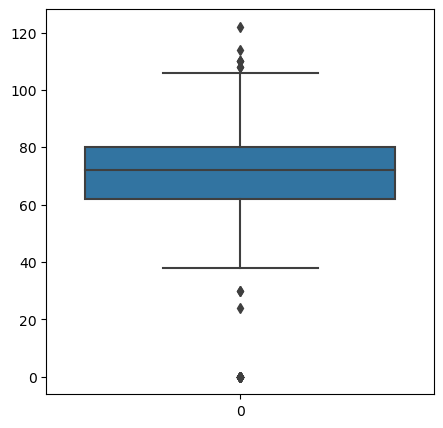

In [123]:
sns.boxplot(data = df.BloodPressure)

In [124]:
## Inference
## kurtosis Greater than 3 leptokurtic(heavy tailed)
## outlier frequency is high
# outliers are on both sides

<AxesSubplot:>

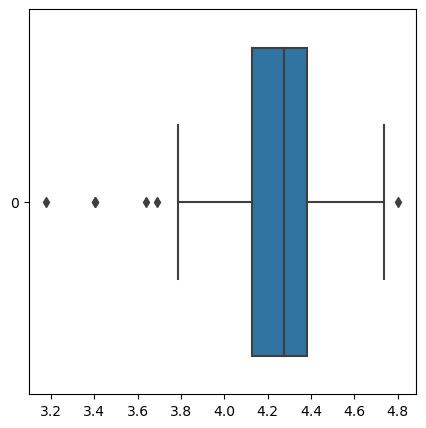

In [125]:
## take the log transformation
sns.boxplot(data = np.log(df['BloodPressure']),orient = 'h')

## 4. Skin Thickness 

In [126]:
## distribution plot of skin thickness  to understand skewness

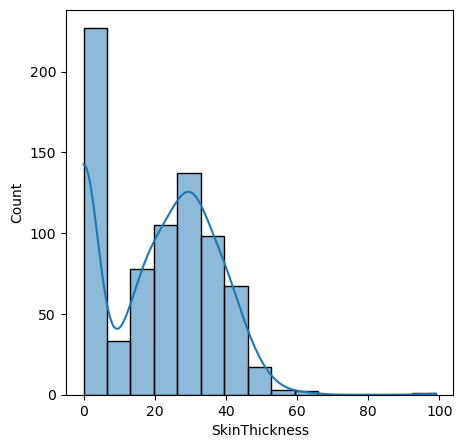

In [127]:
sns.histplot(data = df.SkinThickness, kde = True );

In [128]:
## above is looking skewd and bimodal , to understandt the distribution with skewness plot violin plot

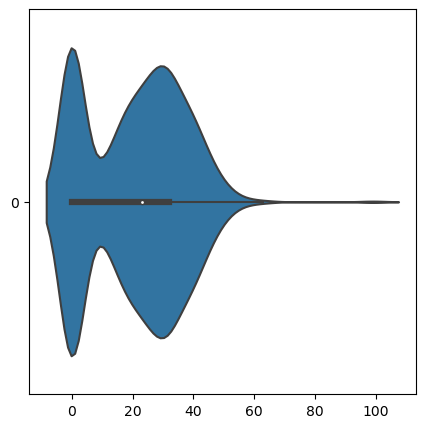

In [129]:
# violin plot 
sns.violinplot(data = df.SkinThickness,orient = 'h');

In [130]:
# above plot shows the data is bimodal , outliers has causes distribution to be skewd and bimodal

## 5. BMI

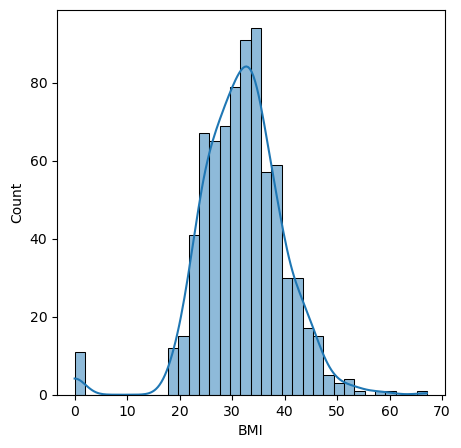

In [131]:
sns.histplot(data = df.BMI, kde = True );

## 6. DiabetesPedigreeFunction

#### DiabetesPedigreeFunction is greater than 1 right skewd

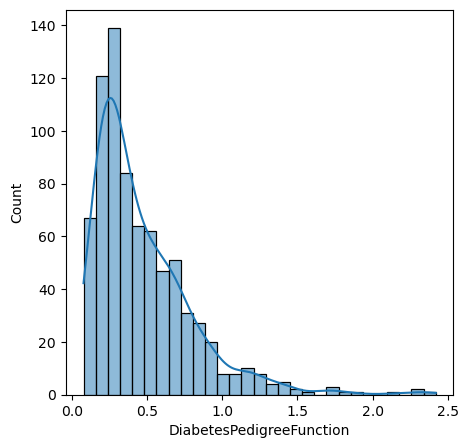

In [132]:
sns.histplot(data = df.DiabetesPedigreeFunction, kde = True );

## 7. Age

#### Age is right skewd skewd value is 1.129 greater than 1

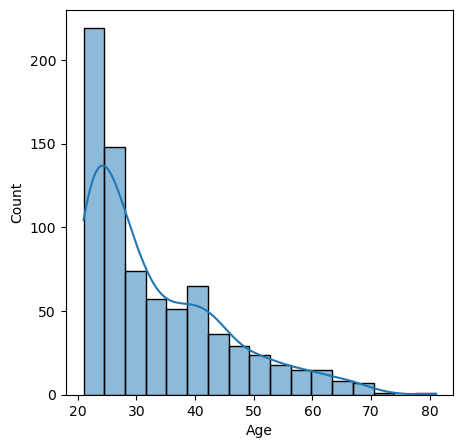

In [133]:
sns.histplot(data = df.Age, kde = True );

## Insulin

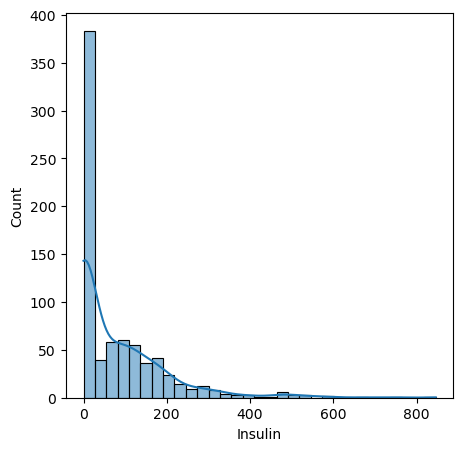

In [134]:
sns.histplot(data = df.Insulin, kde = True );

## Kurtosis

In [135]:
display('Kurtosis shows how steep / flat the histogram / bell curve is at the top.')

'Kurtosis shows how steep / flat the histogram / bell curve is at the top.'

In [136]:
display('Kurtosis : ', df.kurt())

'Kurtosis : '

Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

In [137]:
#NORMAL DISTRIBUTION
## BMI

In [138]:
## LEPTOKURTIC (HIGHER PEAK AND THICKER TAILS)
## INSULIN
## Diabetes PedigreeFunction
## BloodPressure


In [139]:
## PLATYKURTIC(flatter peak thinner tails)
## Pregnancies
## Glucose
## SkinThickness
## Age

# 4. Measures of Dispersion

## 4.1 Range

In [140]:
df.max()-df.min()

Pregnancies                  17.000
Glucose                     199.000
BloodPressure               122.000
SkinThickness                99.000
Insulin                     846.000
BMI                          67.100
DiabetesPedigreeFunction      2.342
Age                          60.000
Outcome                       1.000
dtype: float64

## In EDA (Exploratory Data Analysis), "range" refers to the difference between the maximum and minimum values in a dataset. The range is a simple measure of variability and gives an idea about how spread out the data is.

## 4.2 Variance

In [141]:
df.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

## 4.3 standard deviation

In [142]:
df.std(),df.mean()

(Pregnancies                   3.369578
 Glucose                      31.972618
 BloodPressure                19.355807
 SkinThickness                15.952218
 Insulin                     115.244002
 BMI                           7.884160
 DiabetesPedigreeFunction      0.331329
 Age                          11.760232
 Outcome                       0.476951
 dtype: float64,
 Pregnancies                   3.845052
 Glucose                     120.894531
 BloodPressure                69.105469
 SkinThickness                20.536458
 Insulin                      79.799479
 BMI                          31.992578
 DiabetesPedigreeFunction      0.471876
 Age                          33.240885
 Outcome                       0.348958
 dtype: float64)

## Removing outliers 

In [143]:
Q1 = df.quantile(q = 0.25)
Q3 = df.quantile(q= 0.75)
IQR = df.quantile(q = 0.75) - df.quantile(q = 0.25)
lwr_limit = Q1 - 1.5*IQR
uppr_limit = Q3 + 1.5*IQR

In [144]:
df = df[~((df < lwr_limit)| (df > uppr_limit)).any(axis = 1)]

# Correlation between all columns

<AxesSubplot:>

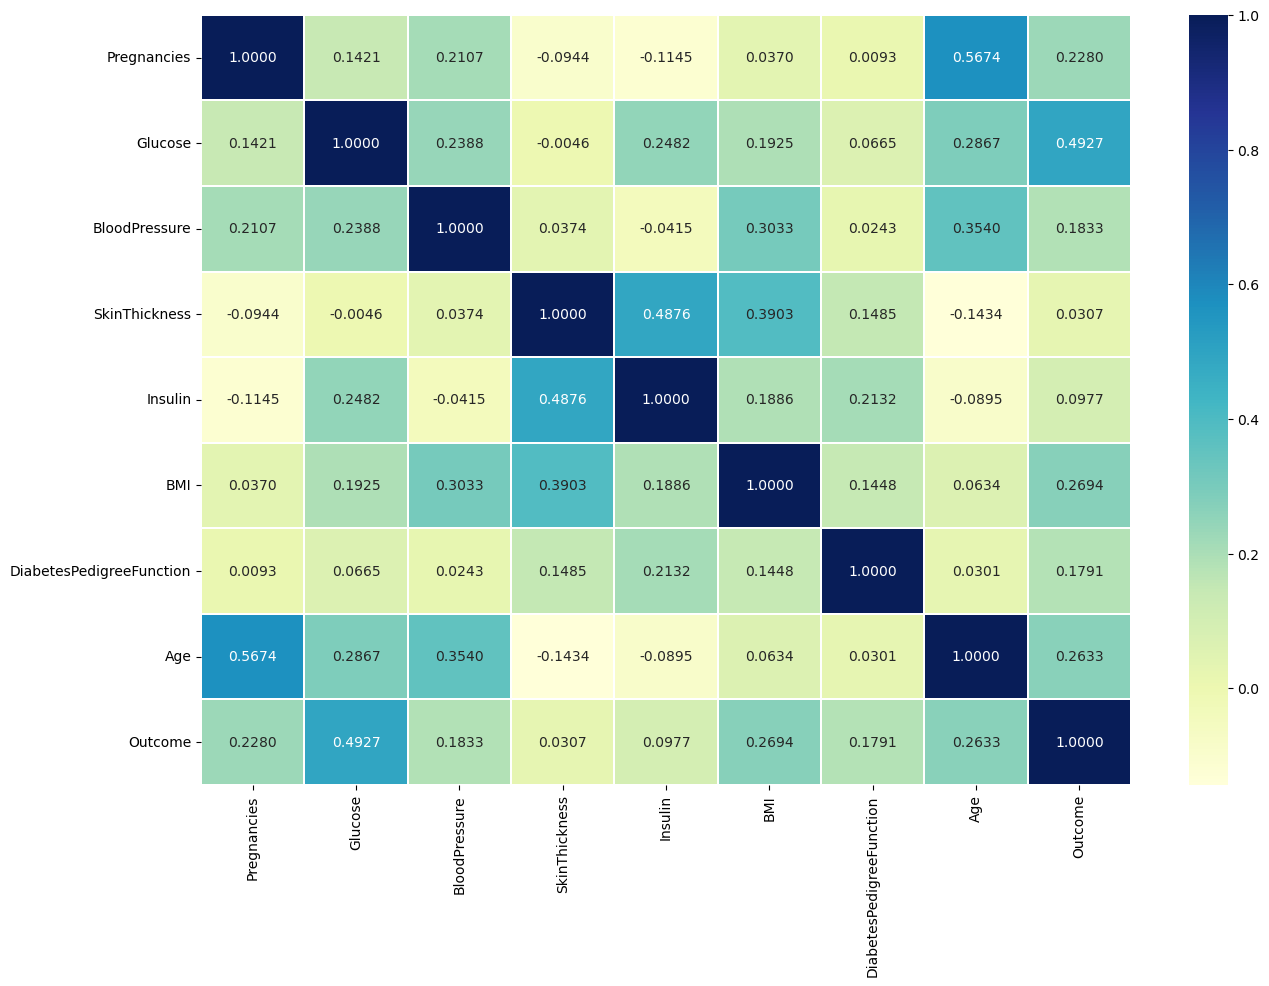

In [145]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

sns.heatmap(df.corr(),annot = True, linewidths =0.05, cmap = 'YlGnBu', fmt = '.4f')

In [146]:
# Load libraries
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score
from sklearn import metrics

def model_fit(data,label_column):
    X=data.iloc[:, data.columns != label_column]
    y=data[label_column]
    scaler = MinMaxScaler()
    x_scaled = scaler.fit_transform(X)
    x = pd.DataFrame(x_scaled,columns = X.columns)
    F1=[]
    classifier=[]
    accuracy=[]
    recall=[]
    precision=[]
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.2,stratify=y)
    dt = DecisionTreeClassifier(max_depth=6,min_samples_leaf=4)
    dt.fit(X_train,y_train)
    y_test_pred = dt.predict(X_test)
    
    print("Decision Tree")
    print(classification_report(y_test_pred,y_test))
    F1_score=f1_score(y_test_pred,y_test)
    cm=metrics.confusion_matrix(y_test_pred,y_test)
    print(cm)
    classifier.append("Decision Tree")
    accuracy.append(accuracy_score(y_test_pred,y_test))
    F1.append(f1_score(y_test_pred,y_test))
    recall.append((cm[0,0])/ (cm[0,0]+cm[0,1]))
    precision.append((cm[0,0])/ (cm[0,0]+cm[1,0]))
    



    print('-------------------------------------------------------------------------')
    
    print("Logistic Regression")
    logreg=LogisticRegression()
    logreg.fit(X_train,y_train)
    y_test_pred=logreg.predict(X_test)

    
    print(classification_report(y_test_pred,y_test))
    print(confusion_matrix(y_test_pred,y_test))
    F1_score=f1_score(y_test_pred,y_test)
    cm=confusion_matrix(y_test_pred,y_test)
    print(cm)
    classifier.append("Logistic Regression")
    accuracy.append(accuracy_score(y_test_pred,y_test))
    F1.append(f1_score(y_test_pred,y_test))
    recall.append((cm[0,0])/ (cm[0,0]+cm[0,1]))
    precision.append((cm[0,0])/ (cm[0,0]+cm[1,0]))

    
    print('-------------------------------------------------------------------------')
    
    print("KNeighbors Classifier")
    knc=KNeighborsClassifier()
    knc.fit(X_train,y_train)
    y_test_pred=knc.predict(X_test)
    
    print(classification_report(y_test_pred,y_test))
    print(confusion_matrix(y_test_pred,y_test))
    F1_score=f1_score(y_test_pred,y_test)
    cm=confusion_matrix(y_test_pred,y_test)
    print(cm)
    classifier.append("KNeighbors Classifier")
    accuracy.append(accuracy_score(y_test_pred,y_test))
    F1.append(f1_score(y_test_pred,y_test))
    recall.append((cm[0,0])/ (cm[0,0]+cm[0,1]))
    precision.append((cm[0,0])/ (cm[0,0]+cm[1,0]))
    
    print('-------------------------------------------------------------------------')
    
    
    results = {
        "Classifier": classifier,
        "F1": F1,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision
    }
    return pd.DataFrame(results)

In [147]:
model_fit(df, 'Outcome')

Decision Tree
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        74
           1       0.75      0.56      0.64        54

    accuracy                           0.73       128
   macro avg       0.74      0.71      0.71       128
weighted avg       0.74      0.73      0.73       128

[[64 10]
 [24 30]]
-------------------------------------------------------------------------
Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        92
           1       0.75      0.83      0.79        36

    accuracy                           0.88       128
   macro avg       0.84      0.86      0.85       128
weighted avg       0.88      0.88      0.88       128

[[82 10]
 [ 6 30]]
[[82 10]
 [ 6 30]]
-------------------------------------------------------------------------
KNeighbors Classifier
              precision    recall  f1-score   support

           0       0.83      0

,Classifier,F1,Accuracy,Recall,Precision
0,Decision Tree,0.638298,0.734375,0.864865,0.727273
1,Logistic Regression,0.789474,0.875000,0.891304,0.931818
2,KNeighbors Classifier,0.589744,0.750000,0.811111,0.829545


# Result 1
# The above model is with result of removing outliers, using quantile . Multicolinearity wasnt removed 

# Second Approach

## Apply PCA remove multiclolinearity 

In [148]:
df_features = df.drop(columns = 'Outcome')

In [149]:
df_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [150]:
df['Outcome'].shape

(639,)

In [151]:
# Mean centering
dfc = df_features - df_features.mean()

In [152]:
dfc.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.195618,28.887324,-0.120501,14.43662,-65.931142,1.59421,0.197823,17.28482
1,-2.804382,-34.112676,-6.120501,8.43662,-65.931142,-5.40579,-0.078177,-1.71518
2,4.195618,63.887324,-8.120501,-20.56338,-65.931142,-8.70579,0.242823,-0.71518
3,-2.804382,-30.112676,-6.120501,2.43662,28.068858,-3.90579,-0.262177,-11.71518
5,1.195618,-3.112676,1.879499,-20.56338,-65.931142,-6.40579,-0.228177,-2.71518


In [153]:
pca = PCA()
pca.fit(dfc)

PCA()

In [154]:
# Eigen vectors
pca.components_

array([[-4.46394786e-03,  1.01643741e-01, -4.53161765e-03,
         9.49139057e-02,  9.90068121e-01,  1.60380196e-02,
         6.69906557e-04, -1.12643833e-02],
       [ 2.49456990e-02,  9.71029391e-01,  1.25198581e-01,
        -9.58344478e-02, -8.86488215e-02,  3.35868832e-02,
         8.48289411e-05,  1.50446033e-01],
       [ 1.37886698e-02,  2.36969720e-02,  3.24082905e-01,
         9.09488778e-01, -9.13846903e-02,  2.37564548e-01,
         1.20369874e-03,  4.75314009e-02],
       [ 1.14095160e-01, -2.12492605e-01,  6.58589696e-01,
        -2.72103895e-01,  5.80766382e-02,  4.92564037e-02,
         6.98448593e-04,  6.54407131e-01],
       [ 1.29724610e-01, -8.16157579e-03, -6.40270750e-01,
         2.15473813e-01, -1.22727256e-02, -1.06521888e-01,
         7.43933675e-04,  7.17796093e-01],
       [ 8.77279943e-03, -3.14154258e-02, -1.88637051e-01,
        -1.84774744e-01,  4.82665587e-03,  9.63519222e-01,
         3.93106813e-03,  2.83271020e-02],
       [-9.84502038e-01, -1.506103

In [155]:
#Corresponding Eigen Values
pca.explained_variance_

array([6.45025786e+03, 8.24189153e+02, 1.86502308e+02, 1.44547923e+02,
       7.90847893e+01, 2.91191004e+01, 6.95636028e+00, 5.92448659e-02])

In [156]:
# projecting all the data points
pca.transform(dfc)

array([[-6.11481281e+01,  3.52053118e+01,  2.10313427e+01, ...,
        -1.82480639e+00,  1.09237183e+00,  2.07484217e-01],
       [-6.79700855e+01, -2.93640593e+01,  9.50167935e+00, ...,
        -4.93296226e+00,  2.73181574e+00, -2.25244104e-02],
       [-6.08476613e+01,  6.85398792e+01, -1.58388823e+01, ...,
        -5.36454717e+00, -4.29024550e+00,  3.27498081e-01],
       ...,
       [ 4.59669680e+01, -3.07357810e+00, -3.48028034e+00, ...,
        -5.92556626e+00, -1.79998152e+00, -1.86600504e-01],
       [-6.66521041e+01,  1.50008436e+01, -1.62544409e+01, ...,
         4.09483821e+00,  5.35291129e+00, -4.32470024e-02],
       [-6.68341988e+01, -2.23626399e+01,  1.33290150e+01, ...,
        -2.87376865e+00,  1.33695745e+00, -6.35140595e-02]])

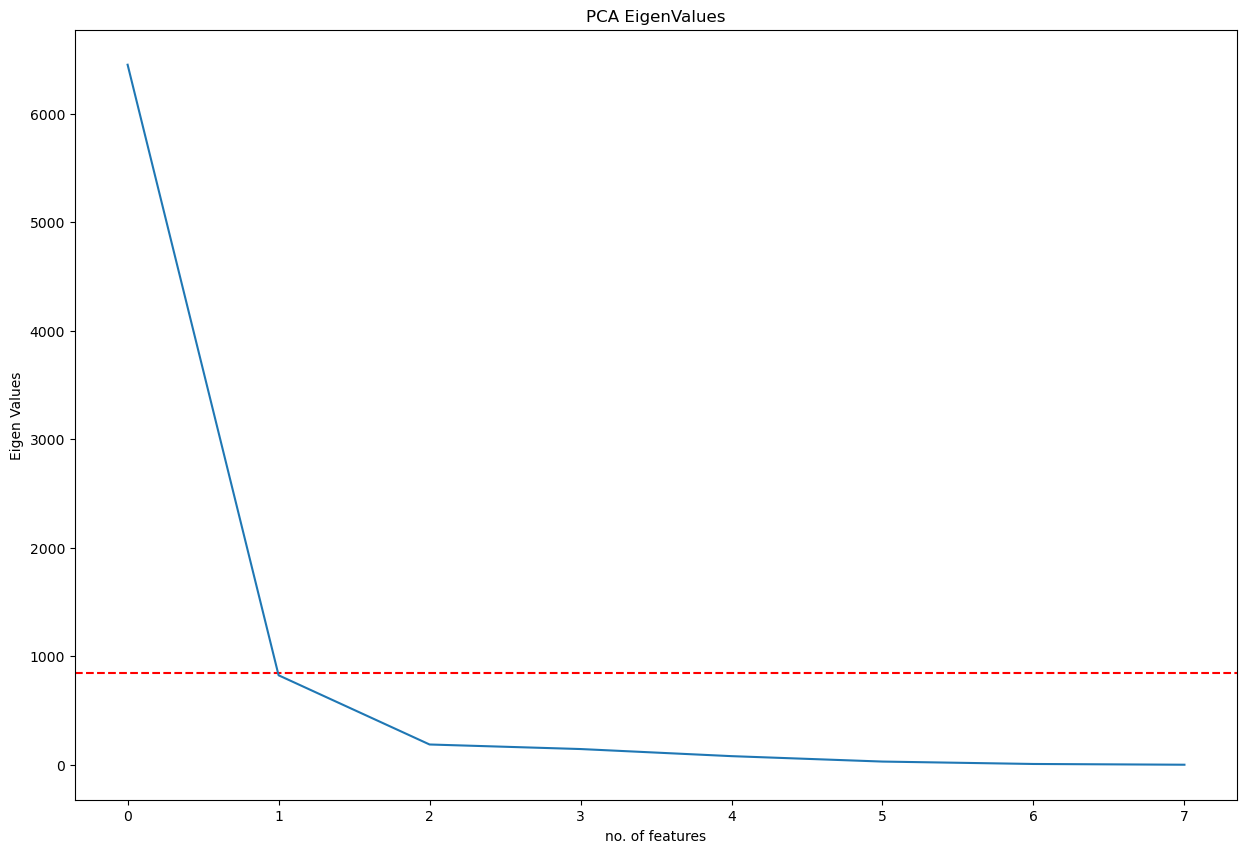

In [157]:
plt.xlabel('no. of features')
plt.ylabel('Eigen Values')
plt.title('PCA EigenValues')
plt.axhline(y = 841 , color = 'r', linestyle = '--')
plt.plot(pca.explained_variance_)
plt.show()

In [158]:
#percentage of variance explained by each principal component.
pca.explained_variance_ratio_

array([8.35448065e-01, 1.06750342e-01, 2.41560874e-02, 1.87220860e-02,
       1.02431927e-02, 3.77155404e-03, 9.00999286e-04, 7.67349300e-06])

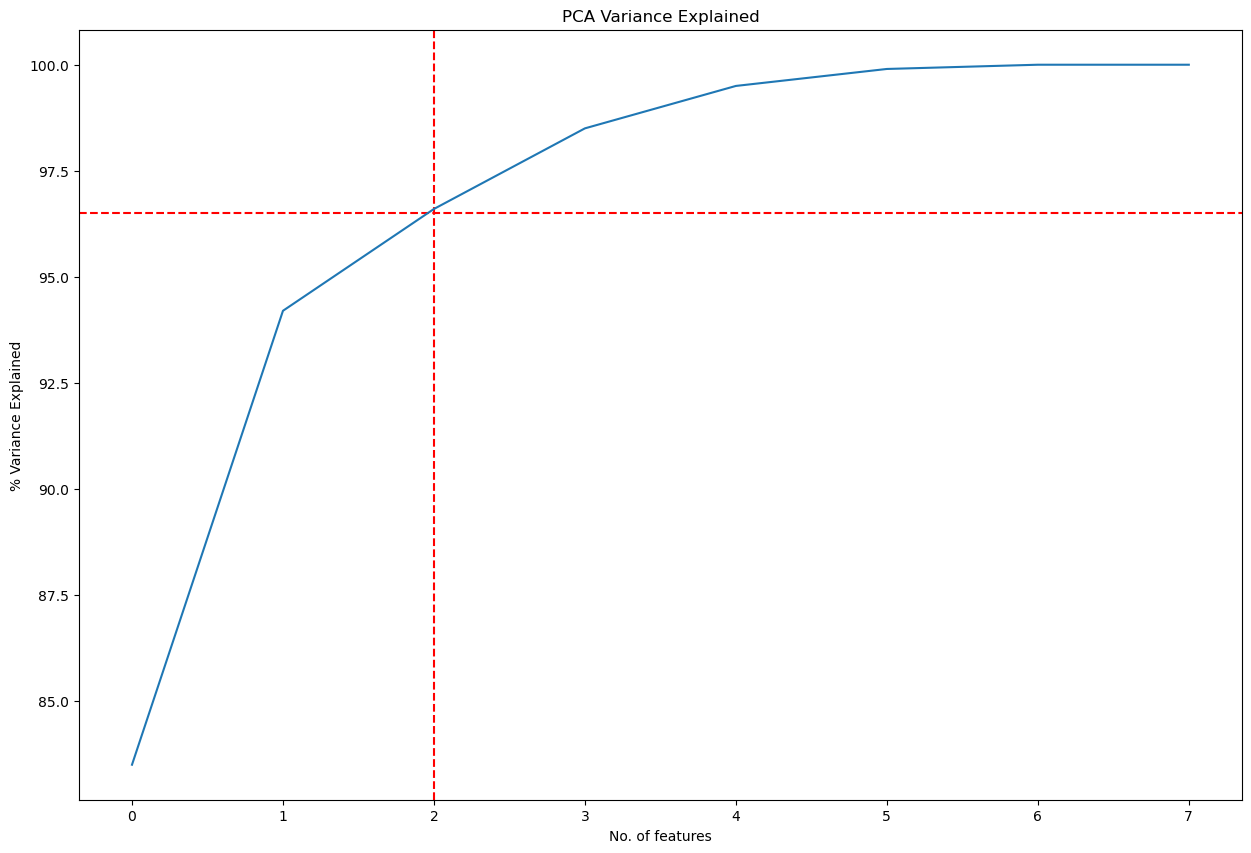

In [159]:
# calculating cumulative sum of variance explained i.e cumulative variance explained
var = np.cumsum(np.round(pca.explained_variance_ratio_,3)*100)
plt.xlabel('No. of features')
plt.ylabel('% Variance Explained')
plt.title('PCA Variance Explained')
plt.axhline(y=96.5,color = 'r', linestyle = '--')
plt.axvline(x = 2 , color = 'r',linestyle = '--')
plt.plot(var)
plt.show()

In [160]:
# variance explained by first two features is 96.5 %
# using first two features to trnasform the data 

In [161]:
pca2 = PCA(n_components = 2)
projection = pca2.fit_transform(dfc)
projection

array([[-61.14812807,  35.20531179],
       [-67.97008551, -29.36405934],
       [-60.84766133,  68.53987922],
       ...,
       [ 45.966968  ,  -3.0735781 ],
       [-66.65210407,  15.00084363],
       [-66.83419881, -22.36263995]])

In [162]:
df_proj = pd.DataFrame(projection)

In [163]:
df_proj

,0,1
0,-61.148128,35.205312
1,-67.970086,-29.364059
2,-60.847661,68.539879
3,25.069987,-34.692020
4,-67.630616,4.434377
...,...,...
634,113.326807,-25.102879
635,-64.213047,7.022238
636,45.966968,-3.073578
637,-66.652104,15.000844


In [164]:
df_proj.rename(columns = {0: 'pca1', 1 : 'pca2'}, inplace = True)

In [165]:
df_proj

,pca1,pca2
0,-61.148128,35.205312
1,-67.970086,-29.364059
2,-60.847661,68.539879
3,25.069987,-34.692020
4,-67.630616,4.434377
...,...,...
634,113.326807,-25.102879
635,-64.213047,7.022238
636,45.966968,-3.073578
637,-66.652104,15.000844


In [166]:
df_proj.shape,df['Outcome'].shape

AttributeError: 'Series' object has no attribute 'shape1'

In [ ]:
# Making new Dataframe
df_new = pd.DataFrame((np.vstack([df_proj['pca1'],df_proj['pca2'],df['Outcome']])).T,columns = ['pca1','pca2','Outcome'])

In [ ]:
df_new

In [ ]:
# set plot size
plt.rcParams["figure.figsize"] = [5,5]

sns.heatmap(df_new.corr(),annot = True, linewidths =0.05, cmap = 'YlGnBu', fmt = '.4f')

In [ ]:
# running the model
model_fit(df_new, 'Outcome')

In [ ]:
model_fit(df, 'Outcome')